In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
import nltk 
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer

In [4]:
df = pd.read_csv("/content/spam.csv",encoding="latin")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [7]:
df.rename({"v1":"label","v2":"text"},inplace=True,axis=1)

In [8]:
df.tail()

,label,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])

In [10]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [11]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer


In [12]:
import re
corpus = []
length = len(df)

In [13]:
for i in range(0,length):
  text = re.sub("^a-Za-Z0-9]"," " ,df["text"][i])
  text = text.lower()
  text = text.split()
  pe = PorterStemmer()
  stopword = stopwords.words("english")
  text = [pe.stem(word) for word in text if not word in set(stopword)]
  text = " ".join(text)
  corpus.append(text)

In [14]:
corpus

['go jurong point, crazy.. avail bugi n great world la e buffet... cine got amor wat...',
 'ok lar... joke wif u oni...',
 "free entri 2 wkli comp win fa cup final tkt 21st may 2005. text fa 87121 receiv entri question(std txt rate)t&c' appli 08452810075over18'",
 'u dun say earli hor... u c alreadi say...',
 'nah think goe usf, live around though',
 "freemsg hey darl 3 week' word back! i'd like fun still? tb ok! xxx std chg send, å£1.50 rcv",
 'even brother like speak me. treat like aid patent.',
 "per request 'mell mell (oru minnaminungint nurungu vettam)' set callertun callers. press *9 copi friend callertun",
 'winner!! valu network custom select receivea å£900 prize reward! claim call 09061701461. claim code kl341. valid 12 hour only.',
 'mobil 11 month more? u r entitl updat latest colour mobil camera free! call mobil updat co free 08002986030',
 "i'm gonna home soon want talk stuff anymor tonight, k? i'v cri enough today.",
 'six chanc win cash! 100 20,000 pound txt> csh11 send 

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=35000)
x =cv.fit_transform(corpus).toarray()

In [16]:
y = pd.get_dummies(df['label'])
y = y.iloc[:, 1].values

In [17]:
import pickle
pickle.dump(cv, open('cv1.pkl','wb'))

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

In [19]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {}  \n".format(sum(y_train == 0)))

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())

print('After OverSampling, the shape of train_x: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train == 0)))




Before OverSampling, counts of label '1': 581
Before OverSampling, counts of label '0': 3876  

After OverSampling, the shape of train_x: (7752, 8194)
After OverSampling, the shape of train_y: (7752,) 

After OverSampling, counts of label '1': 581
After OverSampling, counts of label '0': 3876


In [20]:
 df.describe()

,label
count,5572.000000
mean,0.134063
std,0.340751
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [21]:
 df.shape

(5572, 5)

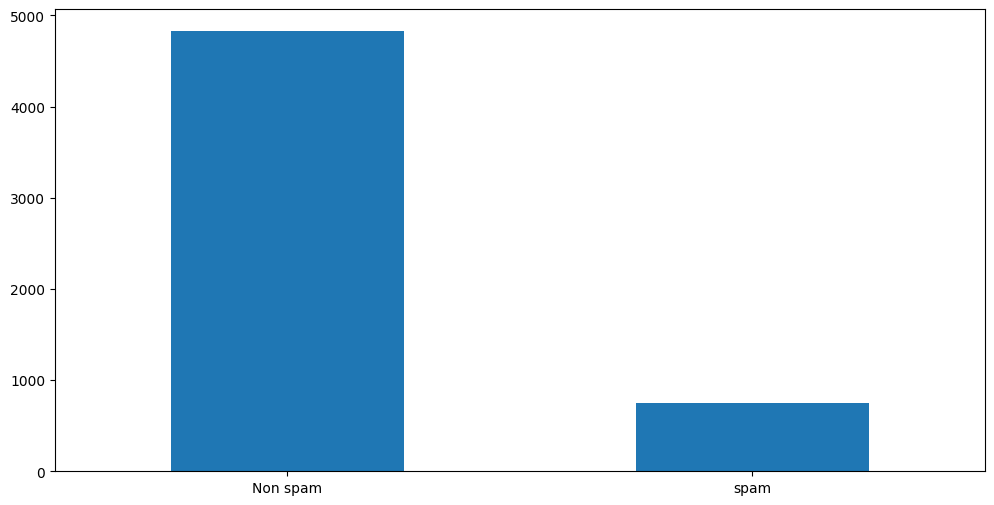

In [22]:
 df["label"].value_counts().plot(kind="bar",figsize=(12,6))
 plt.xticks(np.arange(2),  ('Non spam', 'spam'),rotation=0);


In [23]:
 from sklearn.model_selection import train_test_split
 x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

In [24]:
 from sklearn.tree import DecisionTreeClassifier

In [25]:
 model = DecisionTreeClassifier()
 model.fit(x_train_res, y_train_res)

DecisionTreeClassifier()

In [26]:
 from sklearn.ensemble import  RandomForestClassifier

In [27]:
 model = RandomForestClassifier()
 model.fit(x_train_res, y_train_res)

RandomForestClassifier()

In [28]:
 from sklearn.naive_bayes import MultinomialNB
 model = MultinomialNB()

In [29]:
 model.fit(x_train_res, y_train_res)

MultinomialNB()

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [31]:
 model =  Sequential()

In [32]:
 x_train.shape

(4457, 8194)

In [33]:
 model.add(Dense(units = x_train_res.shape[1],activation="relu",kernel_initializer="random_uniform"))

In [34]:
 model.add(Dense(units =100,activation="relu",kernel_initializer="random_uniform"))

In [35]:
 model.add(Dense(units=1,activation="sigmoid"))

In [36]:
 model.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [37]:
 generator = model.fit(x_train_res,y_train_res,epochs=10,steps_per_epoch=len(x_train_res)//64)

Epoch 1/10
121/121 [==============================] - 139s 1s/step - loss: 0.1178 - accuracy: 0.9675
Epoch 2/10
121/121 [==============================] - 126s 1s/step - loss: 0.0164 - accuracy: 0.9959
Epoch 3/10
121/121 [==============================] - 126s 1s/step - loss: 0.0089 - accuracy: 0.9982
Epoch 4/10
121/121 [==============================] - 123s 1s/step - loss: 0.0083 - accuracy: 0.9985
Epoch 5/10
121/121 [==============================] - 114s 945ms/step - loss: 0.0078 - accuracy: 0.9985
Epoch 6/10
121/121 [==============================] - 112s 926ms/step - loss: 0.0072 - accuracy: 0.9985
Epoch 7/10
121/121 [==============================] - 112s 928ms/step - loss: 0.0076 - accuracy: 0.9987
Epoch 8/10
121/121 [==============================] - 113s 935ms/step - loss: 0.0065 - accuracy: 0.9985
Epoch 9/10
121/121 [==============================] - 123s 1s/step - loss: 0.0089 - accuracy: 0.9987
Epoch 10/10
111/121 [==========================>...] - ETA: 9s - loss: 0.0063 -

121/121 [==============================] - 103s 853ms/step - loss: 0.0063 - accuracy: 0.9989


In [38]:
 y_pred=model.predict(x_test)
 y_pred

35/35 [==============================] - 3s 92ms/step


array([[1.9948400e-10],
       [1.7848400e-03],
       [3.4924572e-13],
       ...,
       [3.0376623e-05],
       [3.5189529e-15],
       [1.3390812e-13]], dtype=float32)

In [39]:
 y_pr = np.where(y_pred>0.5,1,0)

In [40]:
 y_test

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [41]:
 from sklearn.metrics import confusion_matrix,accuracy_score
 cm = confusion_matrix(y_test, y_pr)
 score = accuracy_score(y_test,y_pr)
 print(cm)
 print('Accuracy Score Is:- ' ,score*100)

[[933  16]
 [ 14 152]]
Accuracy Score Is:-  97.30941704035875


In [42]:
 def new_review(new_review):
    new_review = new_review
    new_review = re.sub('[^a-zA-Z]', ' ', new_review)
    new_review = new_review.lower()
    new_review = new_review.split()
    ps = PorterStemmer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    new_review = [ps.stem(word) for word in new_review if not word in   set(all_stopwords)]
    new_review = ' '.join(new_review)
    new_corpus = [new_review]
    new_X_test = cv.transform(new_corpus).toarray()
    new_y_pred = model.predict(new_X_test)
    print(new_y_pred)
    new_X_pred = np.where(new_y_pred>0.5,1,0)
    return new_review
 new_review = new_review(str(input("Enter new review...")))

Enter new review...hello
1/1 [==============================] - 0s 44ms/step
[[0.98991776]]


In [43]:
 from sklearn.metrics import confusion_matrix,accuracy_score
 cm=confusion_matrix(y_test,y_pr)
 score = accuracy_score(y_test,y_pr)
 print(cm)
 print('Accuracy Score Is Naive Bayes:- ' ,score*100)

[[933  16]
 [ 14 152]]
Accuracy Score Is Naive Bayes:-  97.30941704035875


In [44]:
model.save('spam.h5')

In [45]:
!pip install nbconvert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
jupyter nbconvert --to html notebook.ipynb